<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Workings-of-a-Variational-Autoencoder" data-toc-modified-id="Workings-of-a-Variational-Autoencoder-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Workings of a Variational Autoencoder</a></span></li><li><span><a href="#Using-a-VAE-for-creating-images" data-toc-modified-id="Using-a-VAE-for-creating-images-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using a VAE for creating images</a></span><ul class="toc-item"><li><span><a href="#Results" data-toc-modified-id="Results-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Results</a></span></li></ul></li><li><span><a href="#Using-a-VAE-for-creating-sounds" data-toc-modified-id="Using-a-VAE-for-creating-sounds-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Using a VAE for creating sounds</a></span><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Results</a></span></li></ul></li><li><span><a href="#Web-Application" data-toc-modified-id="Web-Application-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Web-Application</a></span></li></ul></div>

This post elaborates on the workings of Variational Autoencoders (VAE) in a theoretical as well as practical way. We first outline the overall workings of a VAE before showing discussing the results of applying a VAE on image as well as sound data.

In contrast to other blog-posts, this post will now show any Python code, since the quantity of code would hurt the readability. The github repository for this project can be found [here](https://github.com/data4help/crispy-train).

# Workings of a Variational Autoencoder

The main idea of an Autoencoder is pretty similar to that of a Principal Component Analysis (PCA). Herein we reduce the existing dimensions of the dataset to a space with fewer dimensions compared to the original dataset. The important difference between PCA and an Autoencoder is that PCA is only using a linear combination of the inputted data, whereas the Autoencoder is also making use of non-linear relationships.

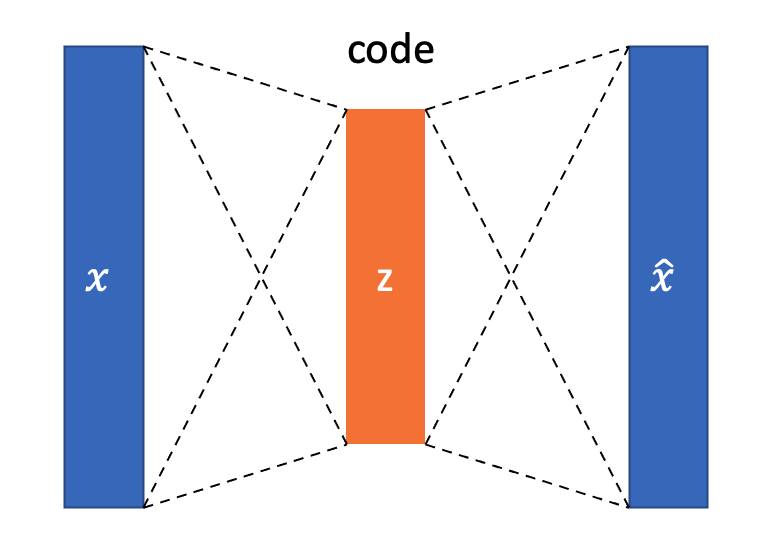

Of course we can make the Autoencoder also deeper and introduce non-linearities. That is also what it makes an Autoencoder a more powerful dimensionality reduction technique in contrast to PCA. It is important to note that dimensionality reduction and not generation of new data is the main use-case of Autoencoders.

In contrast to Autoencoders, Variational Autoencoders are mainly concerned about Variational Inference. To understand what is meant with Variational Inference we start by introducing the concept of *Information*. In general it is possible to quantify the amount of information a certain event *x* has, by the formula:

$$I = -log(p(x))$$

The formula above suggests that the information gain of events which have a high likelihood of occurence is low, whereas the gain is high if an event is unlikely to occur. That makes since if somebody tells you that the day after Sunday is going to be Monday you are not going to be amazed by this information since the probability for that to occur is 100%. If though somebody tells you that it will snow this July you gained quite a bit information, since this event is quite unlikely to occur.

A topic quite related to *Information* is the concept of *Entropy*, which is nothing other than the expectation of *Information*:

$$H = - \sum p(x) log(p(x))$$

After clearing the concepts of *Information* and *Entropy* we asks ourselves the following question: How could we assess the dissimilarity of distributions? 

$$ -\sum q(x) log(q(x)) + \sum p(x) log(p(x)) $$

The last concept we introduce, which is quite related to Entropy is KL-Divergence. The concept of KL-Divergence was already explained in more depth in a past blog-post of mine, but in a nutshell KL-Divergence measure the dissimilarity of two distributions. The dissimilarity of two distributions can be nearly seen as the difference of their entropies, which would be  calculated as:

The only difference from the formula above and KL-Divergence is that the latter always calculated with respect to one distribution. In the example of KL(p||q) that would mean how much information gain would there be if we would use distribution p instead of q. Therefore, the formula for KL(p||q) would be rather:

$$ \begin{align}
KL(p||q) &= -\sum p(x) \cdot log(q(x)) + \sum p(x) \cdot log(p(x)) \\
&= \sum p(x) \cdot log\left( \frac{p(x)}{q(x)} \right)
\end{align}$$

It is also important to know that KL-Divergence is always going to be greater than zero, since it is a measure of dissimilarity. Furthermore, it is to note that KL-Divergence is not symmetric, meaning that KL(p||q) != KL(q||p).

Covering all the concepts we need, we now come back to Variational Inference. As we now from the basic concepts of Autoencoders, we feed *x* as the input, compress that information to *z* and try to *$\hat{x}$* out of it. This first translation from *x* to *z* can also be written as $p(z|x)$, which describes the distribution of *z* given the input *x*. From Bayes theorem we know that we can re-write that formula to:

$\begin{align}
p(z|x) = \frac{p(x|z) \cdot p(z)}{p(x)} = \frac{p(x, z)}{p(x)}
\label{eq: pzx} \tag{1}
\end{align}$

We know that p(x) is usually quite complicated, as it could describe the distribution of images or sounds. Oftentimes this distribution is even intractable. There are now two possible approaches to find that distribution. One approach would be to use Monte-Carlo simulation and continue to sample from that distribution until you can make sense out of it. The second option is Variational Inference. Within this option the idea is to create a new distribution *q(z|x)*, which designed to be tractable and aims to approximate *p(z|x)* as good as possible in order to work-around the intractability of *p(z|x)*.

Creating a new distribution *q* which is supposed to be as close to *p* as possible can be described as a minimization problem using KL-Divergence, namely:

$$\begin{align}
KL(q(z|x)||p(z|x)) = - \sum q(z|x) log\left( \frac{p(z|x)}{q(z|x)} \right)
\label{eq: minkl} \tag{2}
\end{align}$$

Inputting now the result from $\eqref{eq: pzx}$ into formula $\eqref{eq: minkl}$ leads us to:

$$\begin{align}
&= - \sum q(z|x) log \left( \frac{\frac{p(x, z}{p(x)}}{q(z|x)} \right) \\
&= - \sum q(z|x) log \left( \frac{p(x, z)}{q(z|x)} \cdot \frac{1}{p(x)} \right) \\
&= - \sum q(z|x) \left( log \left( \frac{p(x, z)}{q(z|x)} \right) - log(p(x)) \right) \\
&= - \sum q(z|x) log \left( \frac{p(x, z)}{q(z|x)} \right) + \sum q(z) log \left( p(x) \right) \\
&= - \sum q(z|x) log \left( \frac{p(x, z)}{q(z|x)} \right) + log(p(x))
\end{align}$$

Note how the second to last equation simplifies after pulling out log(p(x)) and replacing $\sum q(z|x)$ by one. After steps above we can re-write formula $\eqref{eq: minkl}$ to:

$$\begin{align}
KL(q(z|x)||p(z|x)) &= - \sum q(z|x) log \left( \frac{p(x, z)}{q(z|x)} \right) + log(p(x)) \\
log(p(x)) &= KL(q(z|x)||p(z|x)) + \sum q(z|x) log \left( \frac{p(x, z)}{q(z|x)} \right)\\
\end{align}$$


If we would now assume that *x* is known to us, then $log(p(x))$ would be a constant. If the left-hand side is a constant and we would like to minimize the KL-Divergence on the right-hand side, we are at the same time maximizing the latter part on the right-hand side. This latter part is also called the variational lower bound. That is because since KL-Divergence is always going to zero or positive, $log(p(x))$ can never be smaller than the right hand part.

Looking at this lower-bound in a bit more detail, we see that we can make further simplifications to it:

$\begin{align}
&= \sum q(z|x) log \left( \frac{p(x, z}{q(z|x)} \right) \\
&= \sum q(z|x) log \left( \frac{p(x|z) p(z)}{q(z|x)} \right) \\
&= \sum q(z|x) \left[ log(p(x|z) + log \left( \frac{p(z)}{q(z|x)} \right) \right] \\
&= \sum q(z) log(p(x|z)) + \sum q(x) log \left( \frac{p(z)}{q(z|x)} \right) \\
&= E_{q(z|x)} log(p(x|z)) - KL(q(z|x) || p(z))
\label{eq: lower_bound} \tag{3}
\end{align}$

To remind us what the equation above actually represents. We started by wanting to make the distribution *q* similar to distribution *p*. We therefore minimized the KL-Divergence between these two distributions and found that minimizing KL-Divergence is identical to maximizing the lower-bound. Maximizing the lower-bound means two things according to the equation $\eqref{eq: lower_bound}$. Maximizing the lower bound would mean two things: Maximize $E_{q(z|x)}log(p(x|z))$ and minimize KL(q(z|x) || p(z). Let us now see how these two things fit into our intuition of VAEs.

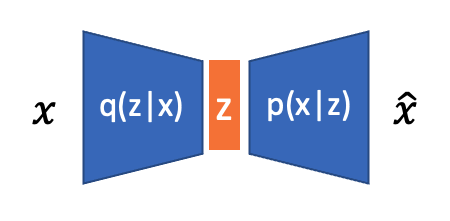

We start with the intuition of $E_{q(z|x)} log(p(x|z))$, which is actually nothing other than a construction error of building $\hat{x}$ when using $x$. To make this step we have to remember that p(x|z) is a neural network and therefore completely deterministic. That means that there is an exact function that transforms *z* into $\hat{x}$, which allows us to re-write  $p(x|z)$ to $p(x|\hat{x})$. Maximizing $p(x|\hat{x})$ means that we would like to maximize the probability to get $x$ when having observation $\hat{x}$. That is in-line with our intuition what a VAE should do.

The second part of $\eqref{eq: lower_bound}$, namely KL(q(z|x) || p(z)) describes that we are trying to minimize the dissimilarity between the result of the neural network *q* and the distribution of *z*, which was priorly chosen. In practice the distribution of *z* is oftentimes chosen to be Gaussian.

After training the VAE through the architecture we just outlined, we can actually use the VAE as a generative model. Since we already trained the model we know the distribution parameters $\mu$ and $\Sigma$ from the Gaussian distribution of $z$. Now we throw away the encoder part of the VAE, meaning that function $q(z|x)$ that we learned. We then sample from the distribution $p(z)$ and feed it to the network $p(x|z)$, which will then generate $\hat{x}$ which after training will look similar to observations from $x$.

The image below shows us how these results would look like when training a VAE to the MNIST dataset. As we can see there is a very smooth transition between the different digits.

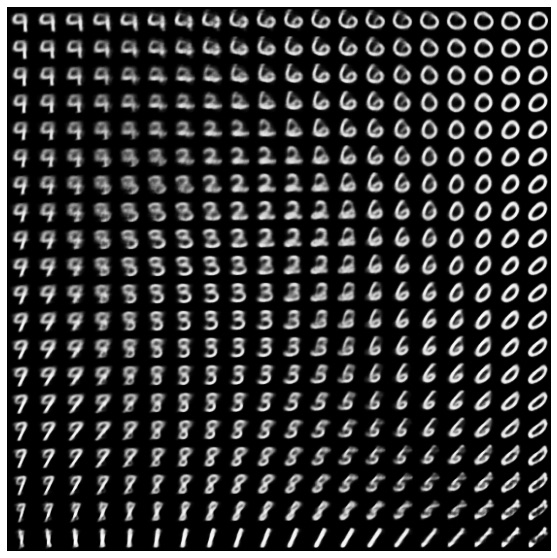

# Using a VAE for creating images

Since we did not want to simply re-create the MNIST example, we decided to work with more designed-focused data. As already talked about in my previous blog-post, generative models can well be used to help with the inefficiencies of the product-design process. In contrast to the car-rims of our last project, in this project we are using images of bottle designs to train our Variational Autoencoder.

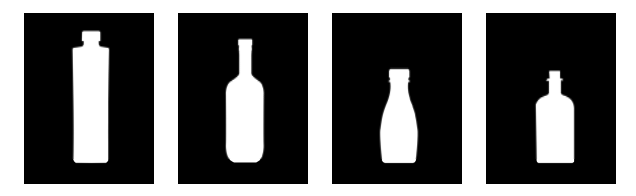

The example bottles above show that the images are already in a good format. First of all they are black and white, which helps to reduce training time

When it comes to create new images using a VAE, we decided to create some images of bottles. Particularly, we are interested in generating new bottle designs. This concept of using a generative model in order to create new product designs was already picked up on in my previous blog-post in which we saw how a Generative Adversial Network could be used in order to create new car-rim designs.

In this post we are using black and white images of bottles designs. The pre-processing of the bottles includes scaling the images by dividing each pixel by 255. This step ensures that each pixel has a value between 0 and 1. Furthermore, given that we only have around 230 images, we apply some image augmentation. The augmentation we are using are different zooming levels. More particular, we are creating 100 augmented versions of each image with a random zoom range between 0.7 and 1.3. Furthermore, given that the images are having a very resolution, we are re-scaling the images. We chose a new size of 128 times 64. Additionally, the images are padded on the left and right with zeros in order to get square images.

The network architecture for the images contains three layers for the encoder and decoder respectively. Given that we would like to nicely create new bottle images using two sliders, we decided for a latent space with two dimensions.

## Results

After training the VAE we can take a look at the latent representation of the trainings data. From the image below we can nicely see how most bottles center around the origin. Furthermore, as outlined above we can see that the distribution of the latent space is approximately Gaussian. This should not come as a surprise, as this was explicitly stated in the model's cost function.

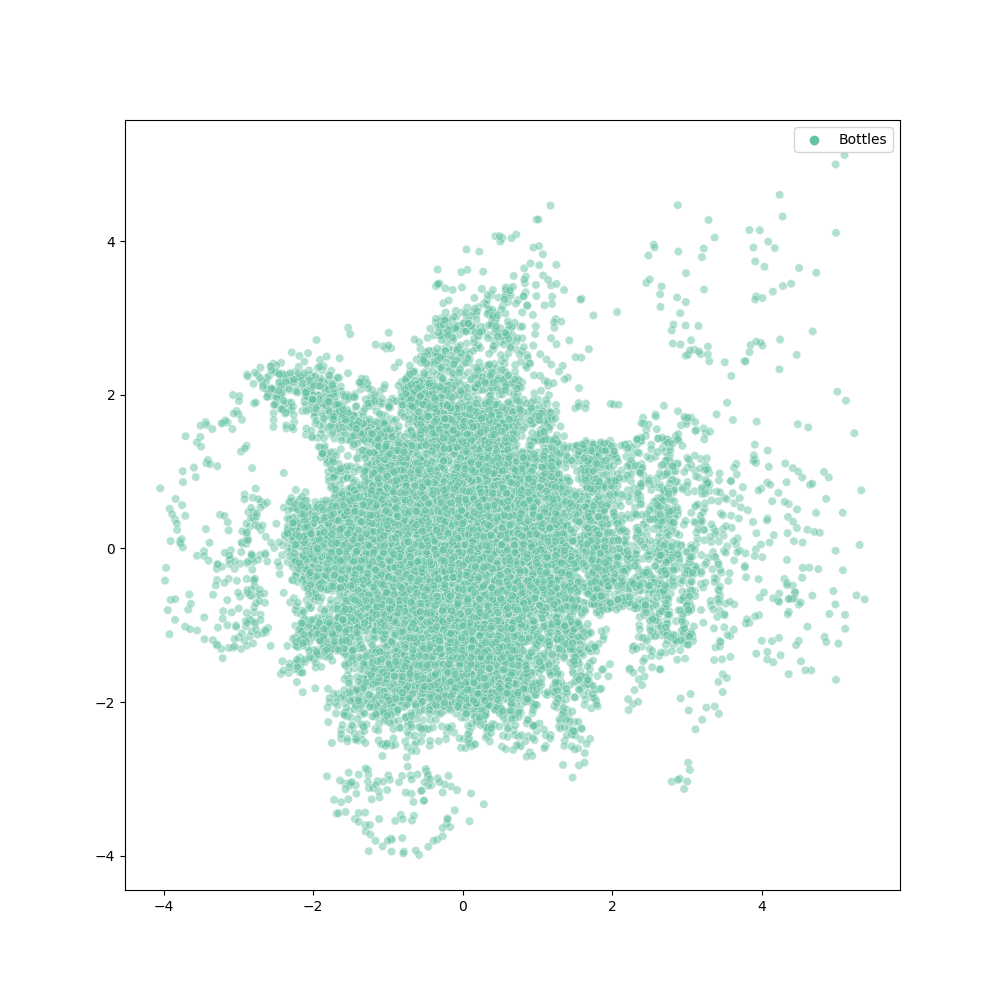

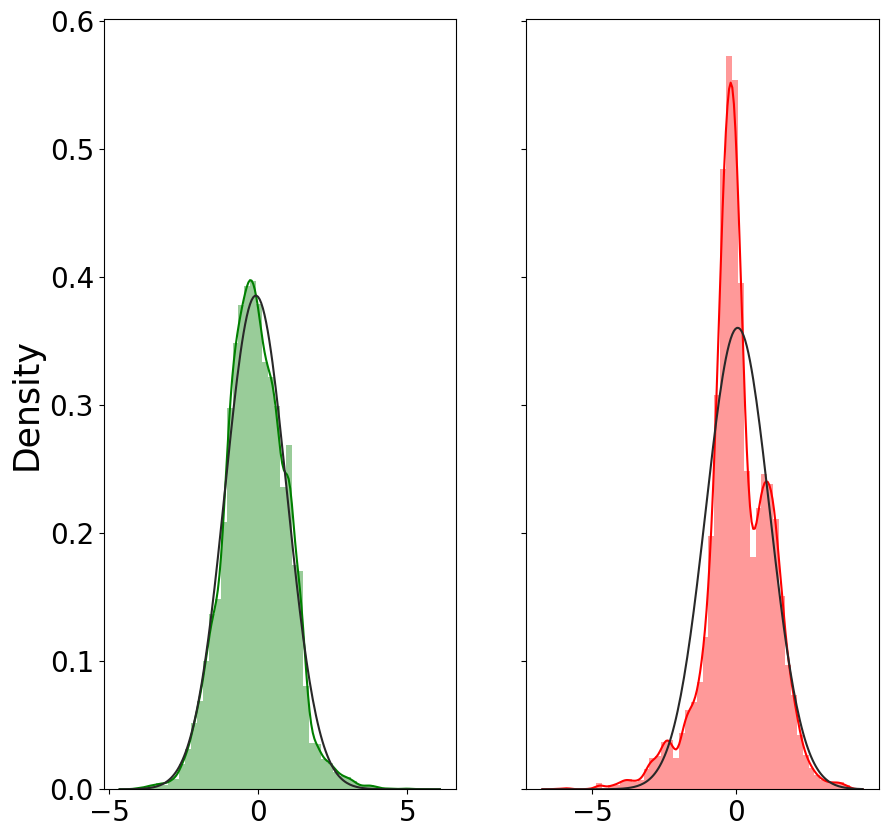

As for the MNIST images, the different areas of the latent representation are describing different kind of bottles. This is also visualized in the image below. Here we can see what the different latent representations look like when translated into real images.

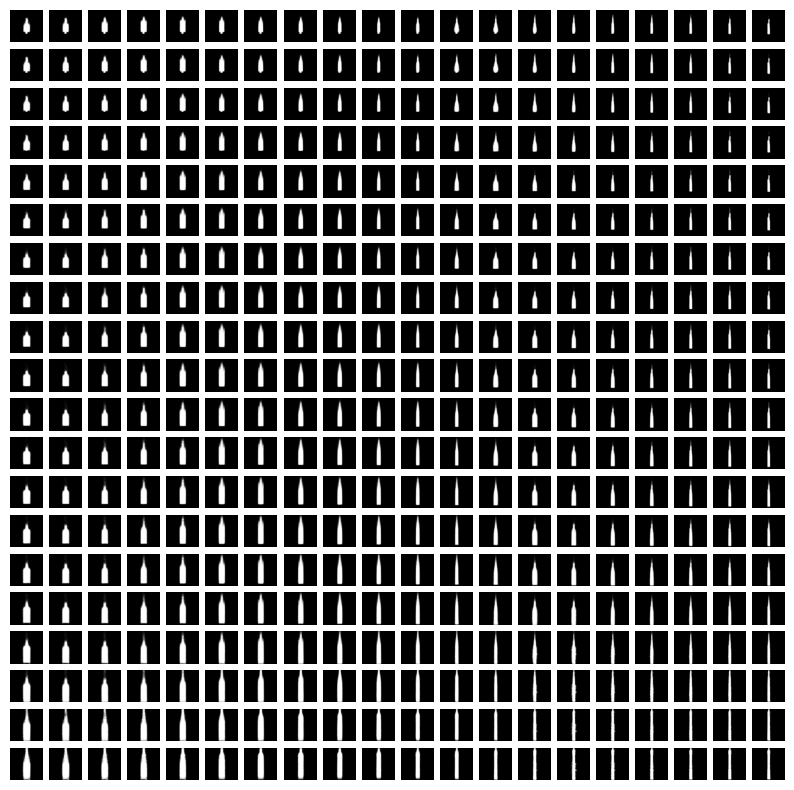

Another interesting insights of the performance of the VAE are the images below. Here we can see how well the VAE re-created already existing images. In the images below we find the original bottle images at the top whereas the re-created ones right beneath it.

It is clearly noticeable that the level of detail is lower for the re-created ones, which is a normal finding for VAEs. Nevertheless, the overall shape of the bottles are still clearly visible and can be easily matched to their original counterpart.

# Using a VAE for creating sounds 

Next to images we are also applying the Variational Autoencoder to sound data. Particularly, we used the genres Techno, Rock and Classical music for our experiment. In order to get a large amount of data, we started by downloading multiple hour long compilations of all three genres and then chopped them into one second long audio pieces. This resulted in having more than 10.000 audio pieces for each music genre.

## Preprocessing

Processing audio data is not as straightforward as for example image data. The problems even begin with the question of how to translate music into a numeric format. That is because sound is analog in nature, since it is a mechanical wave. Therefore, we have to digitalize the signal, which means that we turn the continuous signal into a discrete one. To transform an Analog signal into a discrete form is a process called Analog to Digital Conversion (ADC). ADC can be done through simply sampling data with a certain rate. This concept is illustrated in the image below. All the black dots represent positions at which the amplitude of the signal is sampled. The sampling happens in a pre-defined interval, which is defined as the sampling rate.

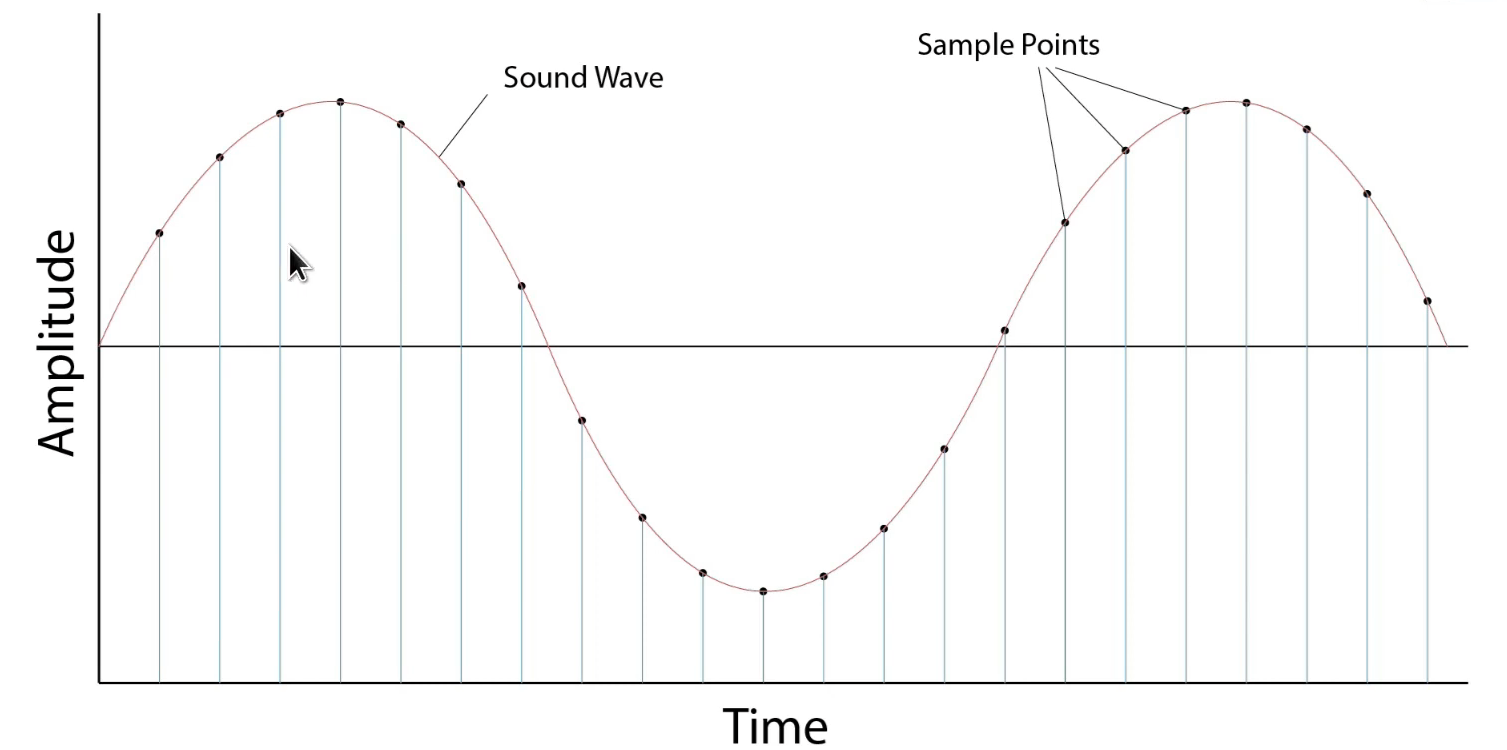

Formally, the sampling rate describes how many samples we collect per second. Therefore, the sampling rate is nothing other than a frequency and is measured in hertz. Intuitively, the lower the sampling rate, the higher our sampling error is going to be.

The question is now which sampling rate to use. A CD for example is using a sampling rate of 44100hz. That value is of course not as arbitrary as it might sound as first. To better understand why this particular frequency is chosen, we first have to introduce the closely related measure of *Nyquist frequency*. The Nyquist frequency is defined as half the sampling rate, and it describes the upper frequency level we can use in a digital signal. Any frequency above above that level would create artifacts. In the case of CDs the Nyquist frequency is 22050, which is even slightly above the level human beings can appreciate and therefore also the value with which we sample our sound-snippets.

After sampling the sound-signals we are now ready to create some features out of them. We do that by performing a so-called *Fourier-Transform*. What a Fourier-Transform does is that it decomposes a complex periodic sound into a sum of sine-waves which are oscillating at different frequencies. In other words, it decomposes a sound into all its smaller components and their individual contribution weight to the overall sound.

In the image below for example we decomposed the sound-wave on the left side into its components. On the right side we see that the red sound-wave consists out of two frequencies. Through the higher amplitude of the lower right-hand side sound-wave we can infer that this frequency contributed more to the overall sound than the upper wave on the right side.

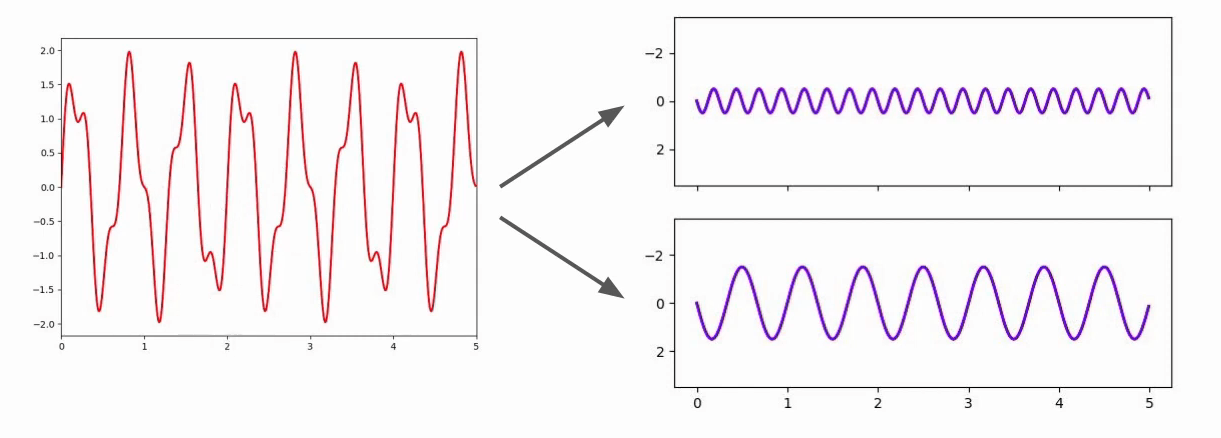

Of course, most sounds have more than only two different frequencies which make up the entire sound. The Fourier Transform extracts all frequencies and also shows what kind of magnitude they carry. Below we show an example what this transformation is doing to a sound snippet from a piano track. On the left side we see the wave form of the sound. On the righ side we have a so-called power-spectrum. This power-spectrum shows on the x-axis all possible frequencies and on the y-axis the magnitude. Through that representation we can see which frequency had what contribution to the overall sound. In our example we can see that especially lower frequencies played an important part of the sound.

When applying a Fourier Transform, one also says that we are moving from the time-domain over to the frequency domain. That is because we now lose the information of how the sound develops over time, but only get an idea about the prominence of the different frequencies. This loss of information is dramatical, as much can be extracted from that information. 

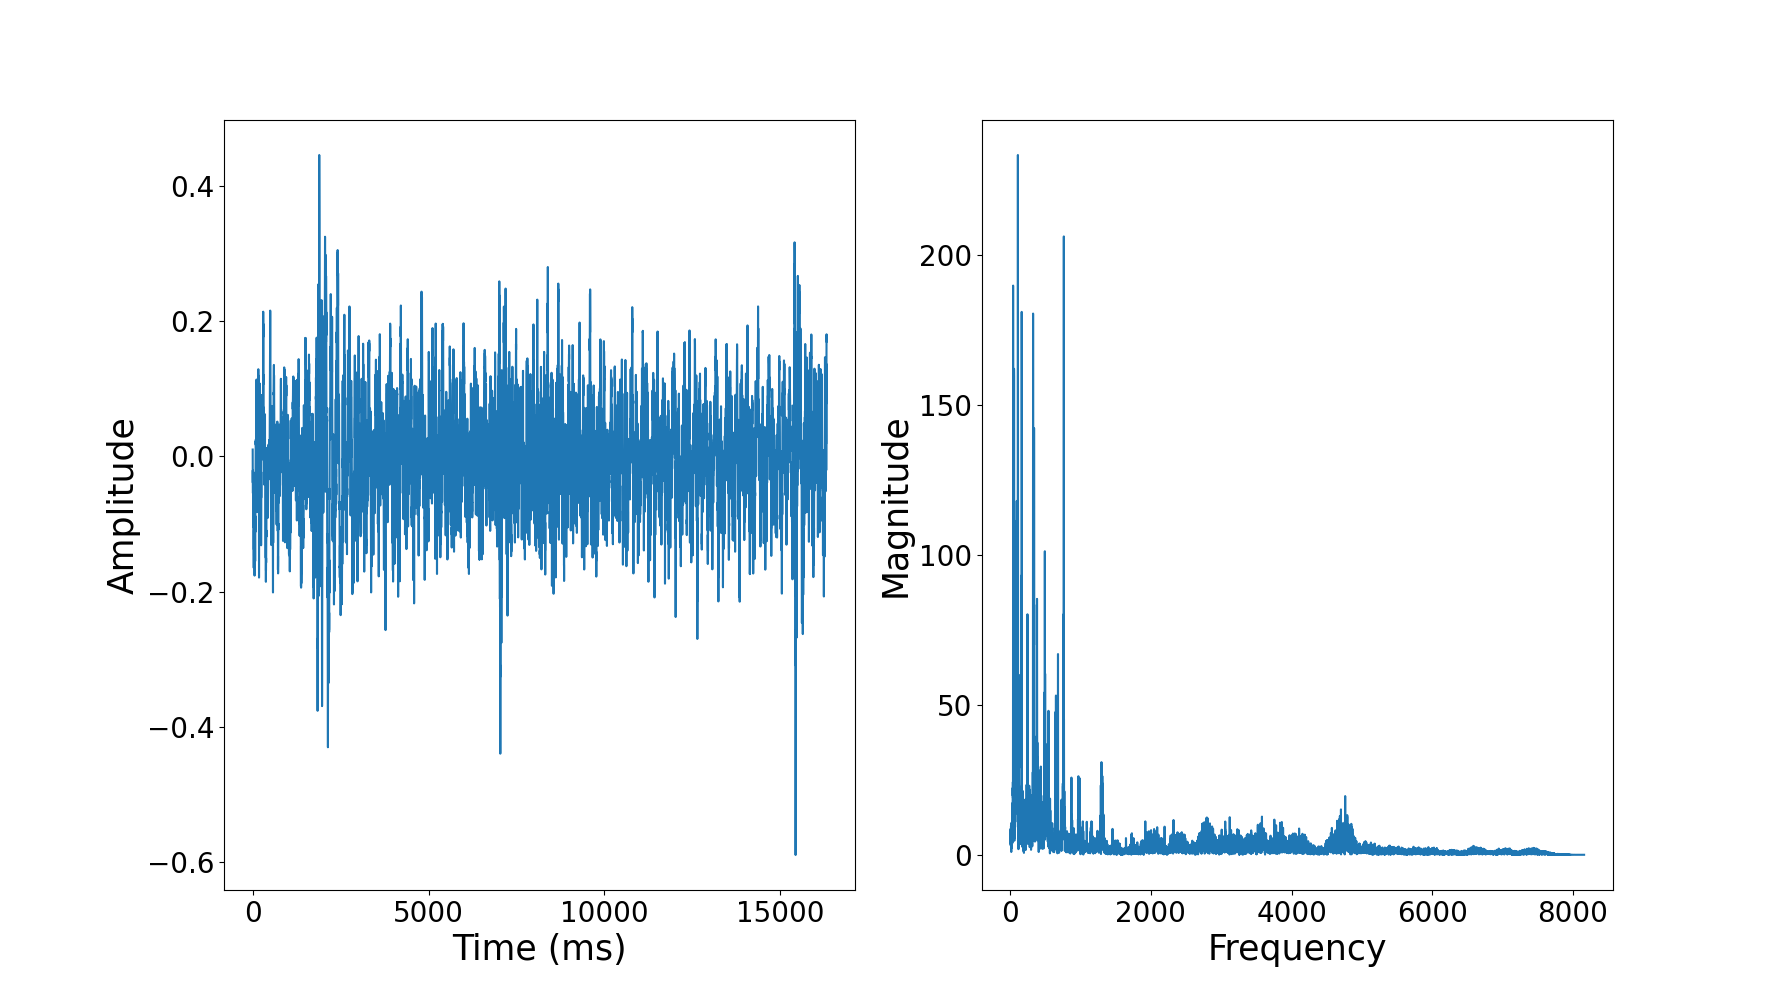

The solution of losing the time component of our data is to apply a *Short-Time-Fourier-Transform* (STFT). This algorithm calculates several Fourier Transform at different time intervals. The result of this algorithm gives us therefore information about time, frequency as well magnitude. The resulting plot of this algorithm is called a *spectogram*. It is exactly that spectogram that we are feeding into our neural network, as it describes the sound-signal to a very detailed but compressed level.

Below we find a short sound-snippet from the techno genre and the corresponding spectogram plot. As outlined above, the specotgram plot shows us which frequency is present to which extend at which time of the sound signal. This particular spectogram indicates for example that at the very beginning of the sound we experience much power in the high frequencies.

In [6]:
from IPython.display import Audio
Audio("../reports/figures/sound_vae/example.wav")

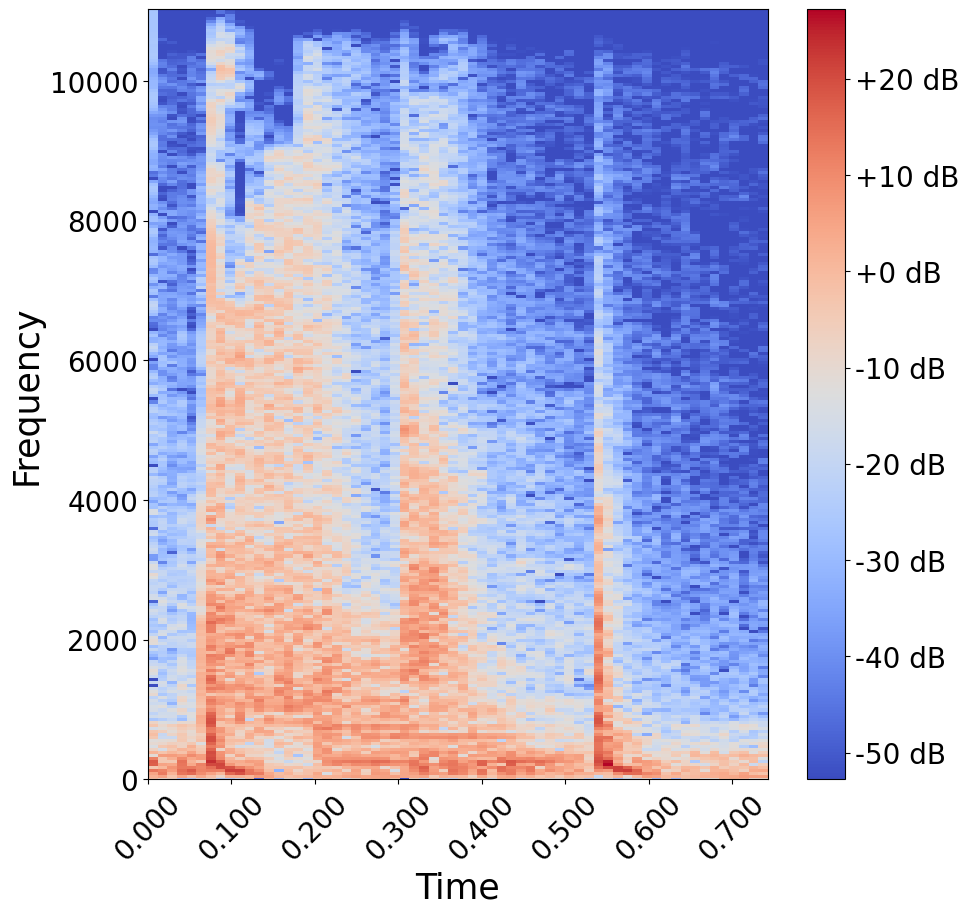

Next to create these STFTs for every sound-snippet we also made sure that every sound snippet had equal length, meaning that their duration was the same for every file. If that was not the case, we right-padded the sound-file with zeros. Additionally checked for missing values in the data since those would break the model. Lastly we scaled every sound-file in order for them to be between zero and one.

## Results

Since sound is significantly more complex than images, we decided to bump up the latent space dimension to 128. In order to still visualize how the different music genres are different from one another, we apply a PCA transformation of the latent space. From the graph below we can see that the Rock and Techno genre are overlapping, whereas the Piano genre seems to be different. Even though surprising, this result is sensible given that Techno and Rock music is much faster paced compared to the slow and calm Piano music.

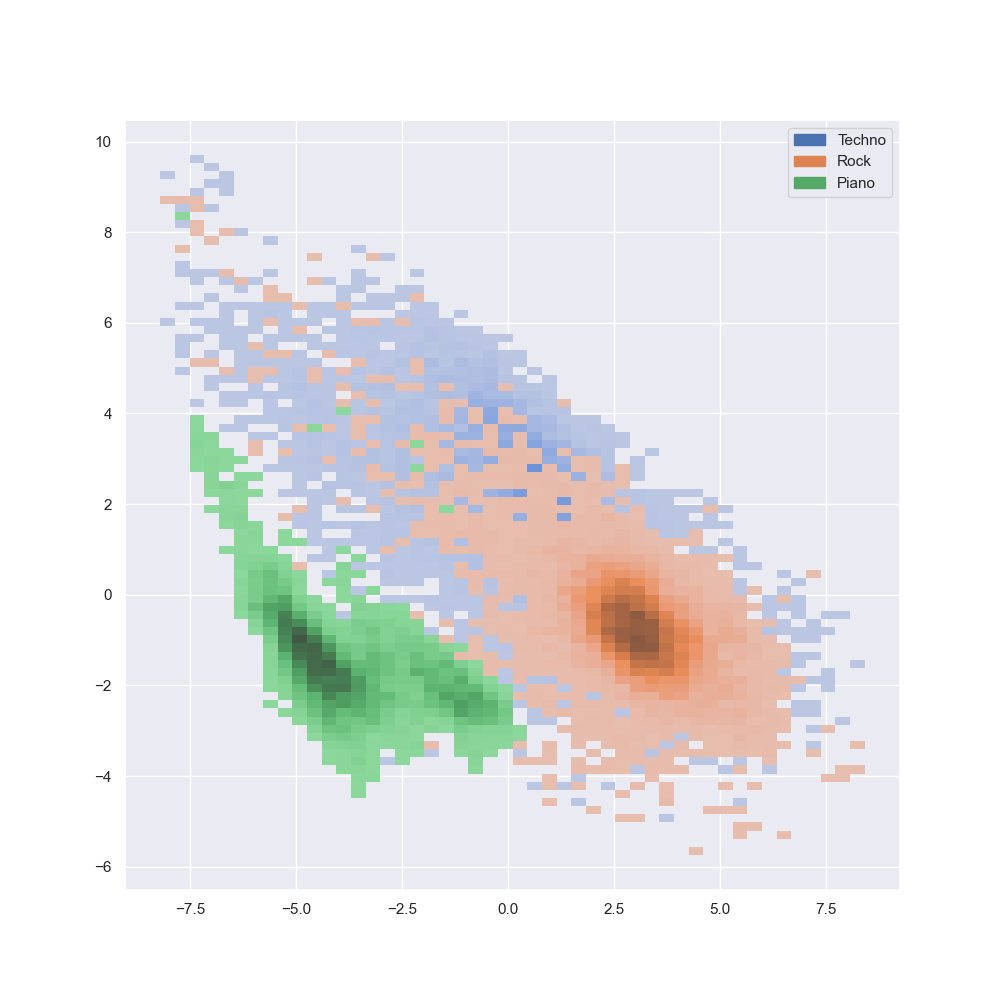

Lastly we take a look at how the spectograms were replicated by the VAE. In the image below we see how the original spectograms of the different genres in the upper row and their replicated counterpart in the lower row.

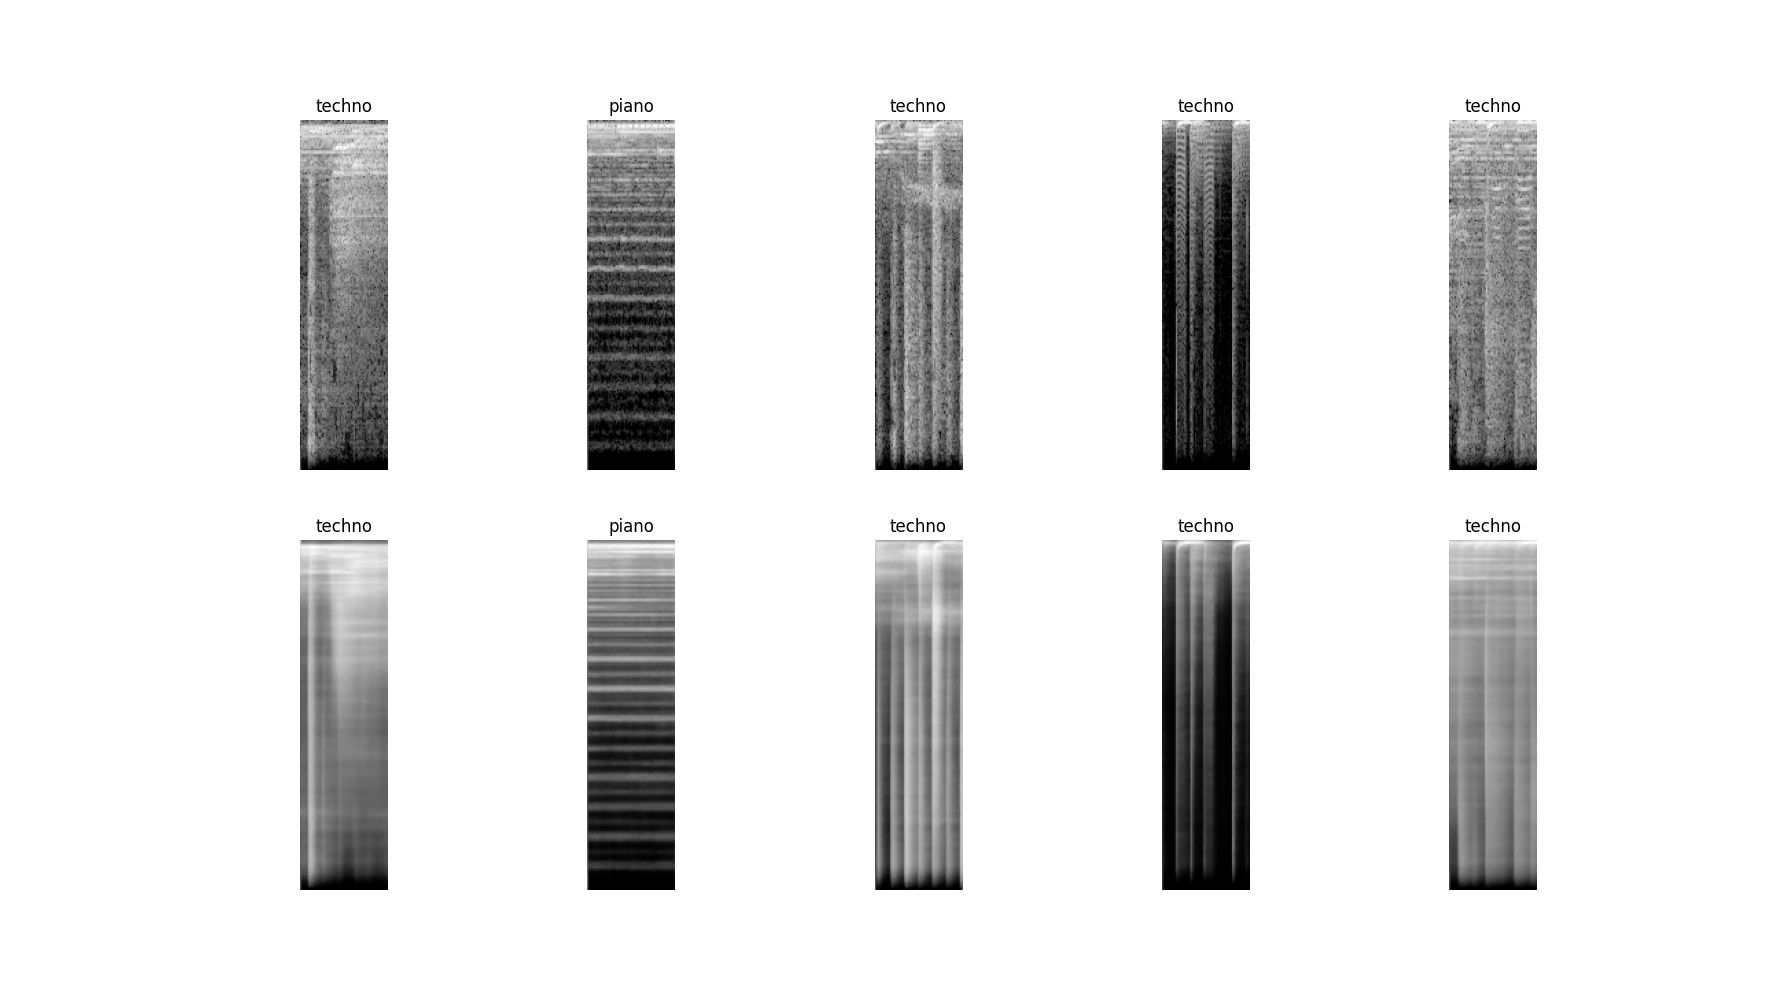

Of course it is quite difficult to tell how well each sound-snippet was replicated when only looking at their spectogram, therefore we also provide below the original sound-snippet next to the re-created one. Listening to the snippets and their re-creation, the difference is noticeable, though tolerable. 

# Web-Application

In order to get a better feel for our results, I build an web-application in streamlit in order to play around with the sound and image data, which can be accessed here.